# Reinforcement Learning Notwbook

In [1]:
from RobotEnvClass import Q_Learning, SARSA_learning, Q_Learning_Randomness
import numpy as np
import matplotlib.pyplot as plt

## Q Learning

In [27]:
q_learning = Q_Learning(dims=(3,3),
                        rewards={'r_time':-1, 'r_pond':-5, 'r_croissant':5, 'r_cogs':5, 'r_work':10},
                        start=(0,0),
                        end=(2,2),
                        positions={'pond':[(1,0)], 'cogs':[(2,0)], 'croissant': [(0,2)]},
                        tubes=[],
                        walls=[[(0, 1), (0, 2)]],
                        max_steps=100,
                        max_episodes=1000
                       )
st = q_learning.visualise_world()
print(st)


X  X  X  X  X  X  X  
X  S     .  X  C  X  
X                 X  
X  P     .     .  X  
X                 X  
X  G     .     E  X  
X  X  X  X  X  X  X  

key:
S  = start location for agent
E  = end location for agent
.  = empty cell
X  = boundary or wall beetween cells
Tn = nth Tube start or end. Agent can travel between the two Tn in one time step
P  = pond: falling in is cold and wet
G  = cog: agent is rewarded for collecting
C  = croissant: agent is rewarded for collecting



In [28]:
q_learning._grid

array([[ 0.,  0.,  5.],
       [-5.,  0.,  0.],
       [ 5.,  0., 10.]])

In [29]:
q_learning.display_matrix(q_learning._R)

,0,1,2,3,4,5,6,7,8
0,-1.0,-1.0,-1.0,-5.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-5.0,-1.0,-1.0,5.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-5.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0
6,-1.0,-1.0,-1.0,-5.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,10.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0


In [30]:
q_learning._R

array([[-1., -1., -1., -5., -1., -1., -1., -1., -1.],
       [-1., -1., nan, -1., -1., -1., -1., -1., -1.],
       [-1., nan, -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -5., -1., -1.,  5., -1., -1.],
       [-1., -1., -1., -5., -1., -1., -1., -1., -1.],
       [-1., -1.,  5., -1., -1., -1., -1., -1., 10.],
       [-1., -1., -1., -5., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  5., -1., 10.],
       [-1., -1., -1., -1., -1., -1., -1., -1., 10.]])

In [31]:
q_learning._R[3]

array([-1., -1., -1., -5., -1., -1.,  5., -1., -1.])

In [32]:
available = np.where(~np.isnan(q_learning._R[3]))[0]
q_vals = q_learning._R[3, available]
q_vals

array([-1., -1., -1., -5., -1., -1.,  5., -1., -1.])

In [33]:
best = available[np.where(q_vals == np.max(q_vals))[0]]
best

array([6])

In [34]:
%%time
Q, Rtot = q_learning.learn(0.8,0.8,0.95)

CPU times: user 204 ms, sys: 7.61 ms, total: 212 ms
Wall time: 206 ms


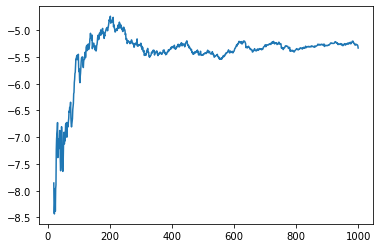

In [35]:
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)
plt.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])

In [25]:
Rtot.shape

(1000,)

In [26]:
q_learning.display_matrix(Q)

,0,1,2,3,4,5,6,7,8
0,2.466667,3.533333,0.000000,4.333333,0.000000,0.000000,0.000000,0.000000,0.0
1,2.466667,3.533333,0.000000,0.000000,5.666667,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,0.0
3,2.466667,0.000000,0.000000,4.333333,5.666667,0.000000,11.666667,0.000000,0.0
4,0.000000,3.533333,0.000000,4.333333,5.666667,8.333333,0.000000,8.333333,0.0
5,0.000000,0.000000,11.666667,0.000000,5.666667,8.333333,0.000000,8.333333,10.0
6,0.000000,0.000000,0.000000,4.333333,0.000000,0.000000,5.666667,8.333333,0.0
7,0.000000,0.000000,0.000000,0.000000,5.666667,0.000000,11.666667,8.333333,10.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Visualisation with original problem

In [9]:
q_learning = Q_Learning()
st = q_learning.visualise_world()
print(st)


X  X  X  X  X  X  X  X  X  X  X  X  X  
X  T0    .     .  X  .     .     .  X  
X                                   X  
X  S     .     T1 X  .     C     .  X  
X                                X  X  
X  .     .     .  X  .     P     .  X  
X                                   X  
X  .     .     .     .     .     T0 X  
X  X     X                          X  
X  .     T1    .     P     .     .  X  
X                                   X  
X  .     .     G  X  .     .     E  X  
X  X  X  X  X  X  X  X  X  X  X  X  X  

key:
S  = start location for agent
E  = end location for agent
.  = empty cell
X  = boundary or wall beetween cells
Tn = nth Tube start or end. Agent can travel between the two Tn in one time step
P  = pond: falling in is cold and wet
G  = cog: agent is rewarded for collecting
C  = croissant: agent is rewarded for collecting



In [7]:
q_learning = Q_Learning(dims=(7,6))
st = q_learning.visualise_world()
print(st)

IndexError: index 43 is out of bounds for axis 1 with size 42